In [ ]:
# import libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
import time

In [ ]:
train_data_url = 'https://raw.githubusercontent.com/ridwant/DataMinig/main/train.csv'
test_data_url = 'https://raw.githubusercontent.com/ridwant/DataMinig/main/test%20(12).csv'

In [ ]:
def data_cleaning(train_data_url):
  #load all data using pandas data frame
  df = pd.read_csv(train_data_url, header=None, sep=',')
  df = df.drop_duplicates()
  return df

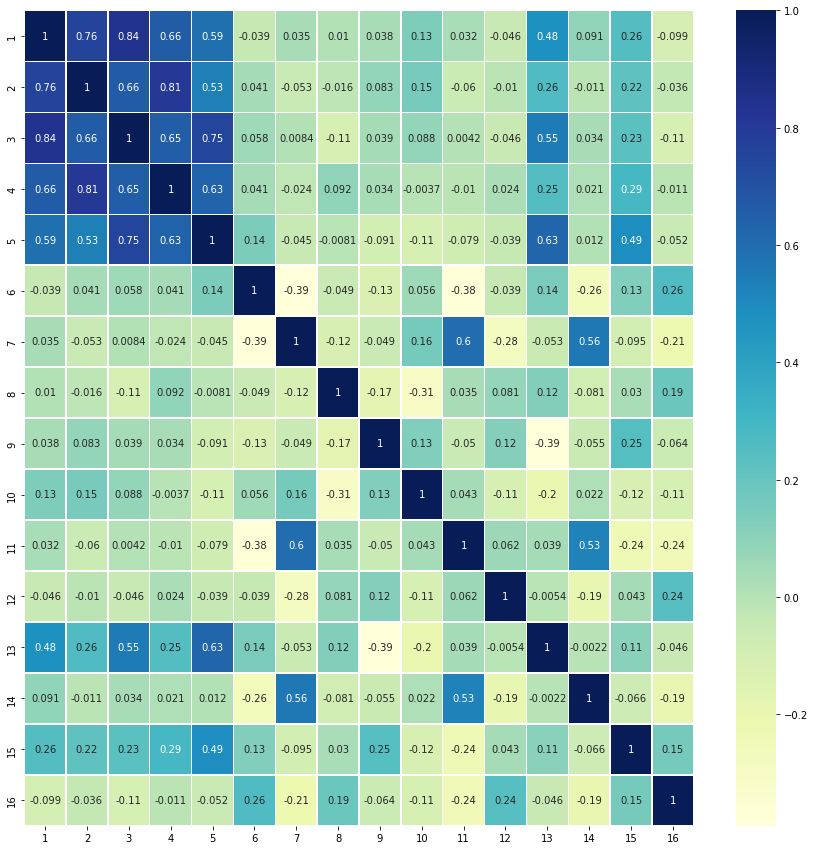

In [ ]:
def see_correlation(train_df):
  train_df.corr()
  fig, ax = plt.subplots(figsize=(15, 15))
  sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True, linewidths=.5)
  plt.show()

train_df = data_cleaning(train_data_url)
see_correlation(train_df)

In [ ]:
def random_forest_classifier(X_train, Y_train, x_test, y_true):
  clf = RandomForestClassifier(random_state=123).fit(X_train, Y_train)
  y_pred = clf.predict(x_test)
  return accuracy_score(y_true, y_pred)

In [ ]:
def mlp_classifier(X_train, Y_train, x_test, y_true):
  clf = MLPClassifier(random_state=59, activation='tanh', max_iter=500, hidden_layer_sizes= (128, 256,)).fit(X_train, Y_train)
  y_pred = clf.predict(x_test)
  return accuracy_score(y_true, y_pred)

In [ ]:
def baseline_model():
	model = Sequential()
	model.add(Dense(128, input_dim=16, activation='tanh'))
	model.add(Dense(256, activation='tanh'))
	model.add(Dense(26, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


def keras_neural_network(X_train, Y_train, x_test, y_true, epochs=100):
	estimator = KerasClassifier(build_fn=baseline_model, epochs=epochs, batch_size=32, verbose=1)
	estimator.fit(X_train, Y_train)
	prediction = estimator.predict(x_test)
	return accuracy_score(y_true, prediction)

<ipython-input-18-084b47743df7>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=32, verbose=0)


123/123 [==============================] - 0s 1ms/step
[2.420069694519043, 100.57696557044983, 79.84938549995422]
[96.29818738830738, 96.68113352055144, 97.0385499106459]


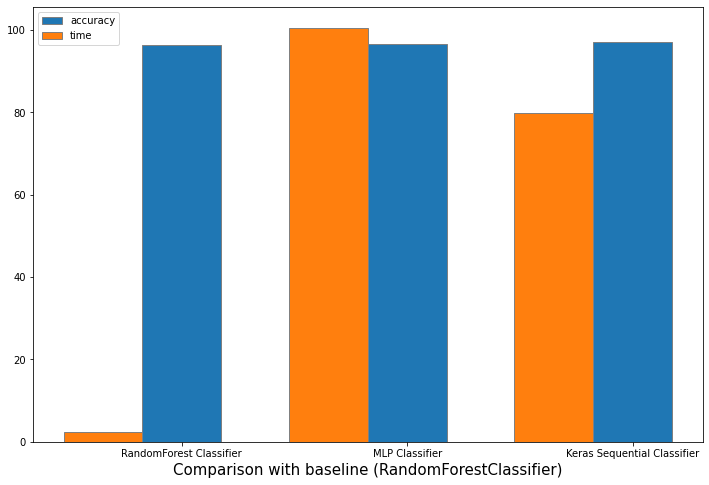

In [ ]:
def comparison_with_baseline_classifier():
  train_df = data_cleaning(train_data_url)
  test_df = data_cleaning(test_data_url)
  le = LabelEncoder()

  Y_train = train_df[0].values
  Y_train = le.fit_transform(Y_train)
  X_train = train_df.drop(columns=[0], axis=1).values

  y_true = test_df[0].values
  y_true = le.fit_transform(y_true)
  x_test = test_df.drop(columns=[0], axis=1).values

  model_names = ['RandomForest Classifier', 'MLP Classifier', 'Keras Sequential Classifier']
  time_scr = list()
  acc_score = list()

  for idx, model in enumerate(model_names):
    start_time = time.time()
    if idx == 0:
      acc = random_forest_classifier(X_train, Y_train, x_test, y_true)
      acc_score.append(acc*100)
      time_scr.append(time.time() - start_time)
    elif idx == 1:
      acc = mlp_classifier(X_train, Y_train, x_test, y_true)
      acc_score.append(acc*100)
      time_scr.append(time.time() - start_time)
    elif idx == 2:
      acc = keras_neural_network(X_train, Y_train, x_test, y_true)
      acc_score.append(acc*100)
      time_scr.append(time.time() - start_time)
    

  print(time_scr)
  print(acc_score)
  # set width of bar
  barWidth = 0.35
  fig = plt.subplots(figsize =(12, 8))
  
  # Set position of bar on X axis
  br1 = np.arange(len(time_scr))
  br2 = [x + barWidth for x in br1]
  
  # Make the plot
  plt.bar(br2, acc_score, width = barWidth,
          edgecolor ='grey', label ='accuracy')
  plt.bar(br1, time_scr, width = barWidth,
          edgecolor ='grey', label ='time')
  # Adding Xticks
  plt.xlabel('Comparison with baseline (RandomForestClassifier)', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(model_names))], model_names)
  
  plt.legend()
  plt.show()


comparison_with_baseline_classifier()


learning on dataset
training: constant learning-rate sgd


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.918917
Training set loss: 0.279411
training: constant with momentum sgd
Training set score: 0.040276
Training set loss: 3.270775
training: inv-scaling learning-rate sgd
Training set score: 0.040608
Training set loss: 3.271236
training: constant learning-rate adam


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.969677
Training set loss: 0.096899


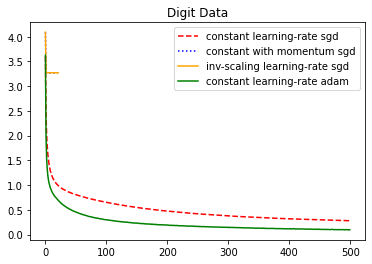

In [ ]:
def plot_on_dataset(X, y):
    params = [
    {
    "solver": "sgd",
    "learning_rate": "constant",
    "learning_rate_init": 0.001,
    },
    {
    "solver": "sgd",
    "learning_rate": "constant",
    "momentum": 0.9,
    "learning_rate_init": 0.2,
    },
    {
    "solver": "sgd",
    "learning_rate": "invscaling",
    "learning_rate_init": 0.2,
    },
    {
    "solver": "adam",
    "learning_rate": "constant",
    "learning_rate_init": 0.001,
    },
    ]

    labels = [
    "constant learning-rate sgd",
    "constant with momentum sgd",
    "inv-scaling learning-rate sgd",
    "constant learning-rate adam",
    ]

    plot_args = [
    {"c": "red", "linestyle": "dashed"},
    {"c": "blue", "linestyle": "dotted"},
    {"c": "orange", "linestyle": "solid"},
    {"c": "green"},
    ]
    plt.title("Digit Data")
    mlps = []
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=500, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)
    plt.legend(labels)  
    plt.show()

train_df = data_cleaning(train_data_url)
test_df = data_cleaning(test_data_url)
Y_train = train_df[0].values
X_train = train_df.drop(columns=[0], axis=1).values
plot_on_dataset(X_train, Y_train)  

Epoch 1/50


<ipython-input-22-34d830249312>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=epochs, batch_size=32, verbose=1)


471/471 [==============================] - 1s 2ms/step - loss: 1.2892 - accuracy: 0.6430
Epoch 2/50
471/471 [==============================] - 1s 2ms/step - loss: 0.7149 - accuracy: 0.7929
Epoch 3/50
471/471 [==============================] - 1s 2ms/step - loss: 0.5392 - accuracy: 0.8406
Epoch 4/50
471/471 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8734
Epoch 5/50
471/471 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8926
Epoch 6/50
471/471 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.9097
Epoch 7/50
471/471 [==============================] - 1s 2ms/step - loss: 0.2558 - accuracy: 0.9228
Epoch 8/50
471/471 [==============================] - 1s 2ms/step - loss: 0.2314 - accuracy: 0.9321
Epoch 9/50
471/471 [==============================] - 1s 2ms/step - loss: 0.2009 - accuracy: 0.9394
Epoch 10/50
471/471 [==============================] - 1s 2ms/step - loss: 0.1806 - accuracy: 0.9441
Epoch 11/5

<ipython-input-22-34d830249312>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=epochs, batch_size=32, verbose=1)


471/471 [==============================] - 1s 2ms/step - loss: 1.3149 - accuracy: 0.6297
Epoch 2/100
471/471 [==============================] - 1s 2ms/step - loss: 0.7288 - accuracy: 0.7883
Epoch 3/100
471/471 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.8372
Epoch 4/100
471/471 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.8681
Epoch 5/100
471/471 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.8907
Epoch 6/100
471/471 [==============================] - 2s 4ms/step - loss: 0.3108 - accuracy: 0.9076
Epoch 7/100
471/471 [==============================] - 2s 4ms/step - loss: 0.2627 - accuracy: 0.9211
Epoch 8/100
471/471 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9277
Epoch 9/100
471/471 [==============================] - 1s 2ms/step - loss: 0.2055 - accuracy: 0.9358
Epoch 10/100
471/471 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9464
E

<ipython-input-22-34d830249312>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=epochs, batch_size=32, verbose=1)


471/471 [==============================] - 2s 2ms/step - loss: 1.3119 - accuracy: 0.6371
Epoch 2/150
471/471 [==============================] - 1s 2ms/step - loss: 0.7271 - accuracy: 0.7891
Epoch 3/150
471/471 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.8356
Epoch 4/150
471/471 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8703
Epoch 5/150
471/471 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8913
Epoch 6/150
471/471 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.9088
Epoch 7/150
471/471 [==============================] - 1s 2ms/step - loss: 0.2619 - accuracy: 0.9217
Epoch 8/150
471/471 [==============================] - 1s 2ms/step - loss: 0.2388 - accuracy: 0.9250
Epoch 9/150
471/471 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9377
Epoch 10/150
471/471 [==============================] - 1s 2ms/step - loss: 0.1855 - accuracy: 0.9431
E

<ipython-input-22-34d830249312>:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=epochs, batch_size=32, verbose=1)


471/471 [==============================] - 1s 2ms/step - loss: 1.2795 - accuracy: 0.6495
Epoch 2/200
471/471 [==============================] - 1s 2ms/step - loss: 0.7158 - accuracy: 0.7899
Epoch 3/200
471/471 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.8408
Epoch 4/200
471/471 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.8691
Epoch 5/200
471/471 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8977
Epoch 6/200
471/471 [==============================] - 1s 2ms/step - loss: 0.2957 - accuracy: 0.9119
Epoch 7/200
471/471 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.9228
Epoch 8/200
471/471 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9324
Epoch 9/200
471/471 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9391
Epoch 10/200
471/471 [==============================] - 1s 2ms/step - loss: 0.1785 - accuracy: 0.9465
E

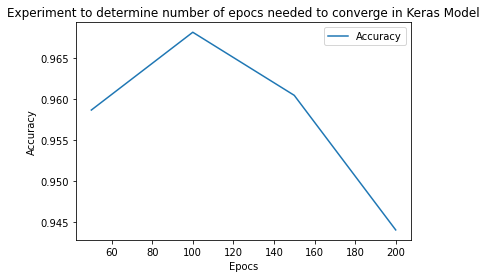

In [ ]:
def experiment_on_number_of_epocs():
  train_df = data_cleaning(train_data_url)
  test_df = data_cleaning(test_data_url)
  le = LabelEncoder()

  Y_train = train_df[0].values
  Y_train = le.fit_transform(Y_train)
  X_train = train_df.drop(columns=[0], axis=1).values

  y_true = test_df[0].values
  y_true = le.fit_transform(y_true)
  x_test = test_df.drop(columns=[0], axis=1).values

  k_array = list()
  y = list()

  for k in range(50,201,50):
    acc = keras_neural_network(X_train, Y_train, x_test, y_true, epochs=k)
    y.append(acc)
    k_array.append(k)
  
  plt.plot(k_array, y, label = "Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epocs')
  plt.title('Experiment to determine number of epocs needed to converge in Keras Model')
  plt.legend()
  plt.show()

experiment_on_number_of_epocs()